## Tidy Tuesday 2021-12-14

**Spice Girls**  
  
The purpose is to do EDA on the data set.  
  
Source: [Tidytuesday repo](https://github.com/rfordatascience/tidytuesday/tree/master/data/2021/2021-12-14)  
  
* `studio_album_tracks`: Audio features of each song from the three studio albums by the Spice Girls. From Spotify.
* `related artists`: Artists deemed to be similar to the Spice Girls, with info about each artist including their musical genres and follower numbers. Includes a row with details for the Spice Girls, for comparison purposes. From Spotify.
* `lyrics`: Lyrics of each song from the three studio albums by the Spice Girls. From Genius.

In [1]:
# data files
path1 = "https://github.com/jacquietran/spice_girls_data/raw/main/data/studio_album_tracks.csv"
path2 = "https://github.com/jacquietran/spice_girls_data/raw/main/data/related_artists.csv"
path3 = "https://github.com/jacquietran/spice_girls_data/raw/main/data/lyrics.csv"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Read in and check data files!  
  
### studio_album_tracks ###

In [4]:
# studio_album_tracks
studio_album_tracks = pd.read_csv(path1)
studio_album_tracks.head()

,artist_name,artist_id,album_id,album_release_date,album_release_year,danceability,energy,key,loudness,mode,...,tempo,track_id,time_signature,duration_ms,track_name,track_number,album_name,key_name,mode_name,key_mode
0,Spice Girls,0uq5PttqEjj3IH1bzwcrXF,4jbWZmf7kRxCBD6tgVepYh,2000-01-01,2000,0.769,0.819,10,-3.941,0,...,109.998,1NwDWbpg9dPH12xBd2ibrv,4,255866,Holler,1,Forever,A#,minor,A# minor
1,Spice Girls,0uq5PttqEjj3IH1bzwcrXF,4jbWZmf7kRxCBD6tgVepYh,2000-01-01,2000,0.829,0.764,5,-3.776,0,...,104.000,0r5d5LmhLQwJVEw0kTEExp,4,254666,Tell Me Why,2,Forever,F,minor,F minor
2,Spice Girls,0uq5PttqEjj3IH1bzwcrXF,4jbWZmf7kRxCBD6tgVepYh,2000-01-01,2000,0.614,0.788,11,-5.547,1,...,116.029,5EE1Uzg0JvtBhs6TRs33R0,4,298293,Let Love Lead The Way,3,Forever,B,major,B major
3,Spice Girls,0uq5PttqEjj3IH1bzwcrXF,4jbWZmf7kRxCBD6tgVepYh,2000-01-01,2000,0.736,0.779,8,-5.163,1,...,101.023,2O8kqbUJS1vkL3x9mF7WzM,4,251000,Right Back At Ya,4,Forever,G#,major,G# major
4,Spice Girls,0uq5PttqEjj3IH1bzwcrXF,4jbWZmf7kRxCBD6tgVepYh,2000-01-01,2000,0.860,0.710,1,-4.214,0,...,110.002,7xzDDFO7L1o5ANyzOYbbWZ,4,226266,Get Down With Me,5,Forever,C#,minor,C# minor


In [5]:
studio_album_tracks.shape

(31, 25)

In [10]:
studio_album_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   artist_name         31 non-null     object 
 1   artist_id           31 non-null     object 
 2   album_id            31 non-null     object 
 3   album_release_date  31 non-null     object 
 4   album_release_year  31 non-null     int64  
 5   danceability        31 non-null     float64
 6   energy              31 non-null     float64
 7   key                 31 non-null     int64  
 8   loudness            31 non-null     float64
 9   mode                31 non-null     int64  
 10  speechiness         31 non-null     float64
 11  acousticness        31 non-null     float64
 12  instrumentalness    31 non-null     float64
 13  liveness            31 non-null     float64
 14  valence             31 non-null     float64
 15  tempo               31 non-null     float64
 16  track_id  

In [11]:
studio_album_tracks.describe()

,album_release_year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms,track_number
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.0,31.000000,31.000000
mean,1997.741935,0.654355,0.742710,5.838710,-5.993161,0.548387,0.044419,0.134559,0.057280,0.167316,0.657723,114.744032,4.0,248674.967742,5.677419
std,1.750576,0.129627,0.118698,3.769145,1.845419,0.505879,0.023405,0.169363,0.164010,0.147739,0.237043,27.085337,0.0,40070.001820,3.037401
min,1996.000000,0.301000,0.481000,0.000000,-9.328000,0.000000,0.025100,0.002590,0.000000,0.030700,0.073400,80.140000,4.0,166533.000000,1.000000
25%,1996.000000,0.580000,0.677000,2.000000,-7.834500,0.000000,0.031450,0.016050,0.000000,0.072700,0.516000,100.014000,4.0,227746.500000,3.000000
50%,1997.000000,0.691000,0.750000,6.000000,-5.547000,1.000000,0.037600,0.064800,0.000012,0.117000,0.751000,107.020000,4.0,251000.000000,6.000000
75%,2000.000000,0.726500,0.824500,9.000000,-4.780500,1.000000,0.046850,0.182500,0.007150,0.212000,0.838500,121.009000,4.0,271066.500000,8.000000
max,2000.000000,0.860000,0.993000,11.000000,-2.316000,1.000000,0.140000,0.744000,0.733000,0.730000,0.965000,190.159000,4.0,326826.000000,11.000000


In [13]:
studio_album_tracks.columns

Index(['artist_name', 'artist_id', 'album_id', 'album_release_date',
       'album_release_year', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'track_id', 'time_signature', 'duration_ms',
       'track_name', 'track_number', 'album_name', 'key_name', 'mode_name',
       'key_mode'],
      dtype='object')

In [38]:
studio_album_tracks.isna().sum()

artist_name           0
artist_id             0
album_id              0
album_release_date    0
album_release_year    0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
track_id              0
time_signature        0
duration_ms           0
track_name            0
track_number          0
album_name            0
key_name              0
mode_name             0
key_mode              0
dtype: int64

In [26]:
# Check unique values for each column
for col in studio_album_tracks:
    print(f'Column: {col}')
    print(studio_album_tracks[col].unique())
    print("")

Column: artist_name
['Spice Girls']

Column: artist_id
['0uq5PttqEjj3IH1bzwcrXF']

Column: album_id
['4jbWZmf7kRxCBD6tgVepYh' '3sr6lAuO3nmB1u8ZuQgpiX'
 '3x2jF7blR6bFHtk4MccsyJ']

Column: album_release_date
['2000-01-01' '1997-01-01' '1996-01-01']

Column: album_release_year
[2000 1997 1996]

Column: danceability
[0.769 0.829 0.614 0.736 0.86  0.798 0.671 0.571 0.709 0.536 0.552 0.556
 0.722 0.333 0.625 0.707 0.724 0.672 0.589 0.473 0.301 0.768 0.726 0.646
 0.8   0.721 0.615 0.727 0.691 0.544 0.7  ]

Column: energy
[0.819 0.764 0.788 0.779 0.71  0.751 0.75  0.481 0.872 0.539 0.694 0.993
 0.845 0.631 0.675 0.905 0.934 0.859 0.702 0.698 0.523 0.864 0.679 0.665
 0.743 0.669 0.734 0.83  0.587 0.755 0.786]

Column: key
[10  5 11  8  1  0  7  4  2  6]

Column: loudness
[-3.941 -3.776 -5.547 -5.163 -4.214 -4.569 -2.83  -5.745 -2.316 -5.37
 -4.489 -5.067 -4.446 -4.992 -8.373 -5.534 -5.271 -5.367 -6.702 -8.133
 -5.859 -6.145 -6.219 -7.878 -7.931 -7.791 -9.328 -6.658 -8.423 -9.09
 -8.621]

Column

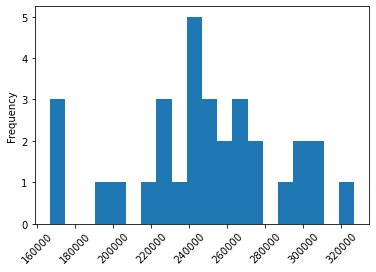

In [30]:
studio_album_tracks["duration_ms"].plot(bins=20,
                                        kind = "hist",
                                        rot=45)
plt.show()

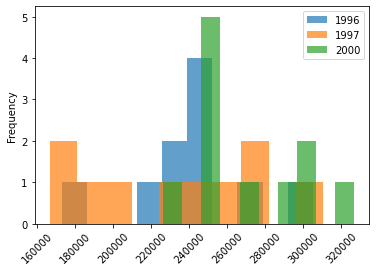

In [35]:
# duration distribution over three albums
studio_album_tracks[studio_album_tracks["album_release_year"]==1996]["duration_ms"].plot(bins=10, kind = "hist", rot=45, alpha = 0.7)
studio_album_tracks[studio_album_tracks["album_release_year"]==1997]["duration_ms"].plot(bins=10, kind = "hist", rot=45, alpha = 0.7)
studio_album_tracks[studio_album_tracks["album_release_year"]==2000]["duration_ms"].plot(bins=10, kind = "hist", rot=45, alpha = 0.7)
plt.legend([1996,1997,2000])
plt.show()